In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Import dataset from Kaggle

In [45]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
#change genre to gender
df['Gender']=df['Genre']

In [47]:
df=df.drop('Genre', axis=1)

In [60]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [49]:
#change column order
df=df[['CustomerID','Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [50]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [51]:
X=df[['Spending Score (1-100)','Annual Income (k$)',]].values

In [52]:
corr = df.drop('CustomerID', axis=1).corr()
corr.style.background_gradient(cmap='BuPu')

,Age,Annual Income (k$),Spending Score (1-100)
Age,1,-0.012398,-0.327227
Annual Income (k$),-0.012398,1,0.00990285
Spending Score (1-100),-0.327227,0.00990285,1


### Scatterplot

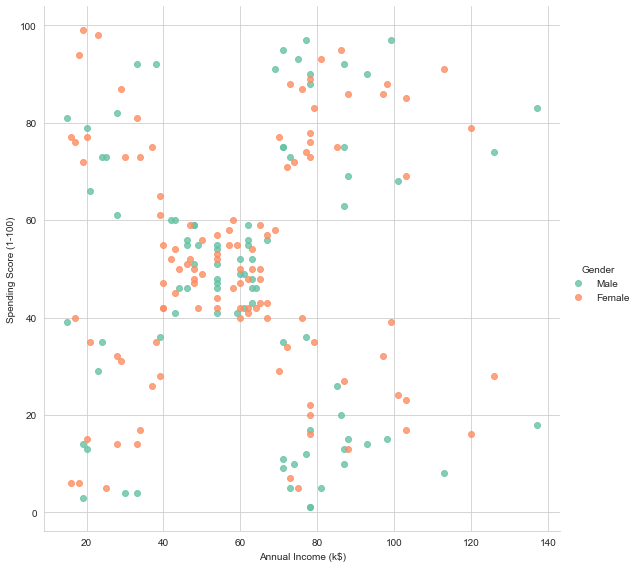

In [64]:
sns.set_style('whitegrid')
sns.lmplot('Annual Income (k$)','Spending Score (1-100)',data=df, hue='Gender',
           palette='Set2',size=8,aspect=1,fit_reg=False)


### Elbow Method

In [54]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    #preventing random initialization: 'init=k-means++'
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


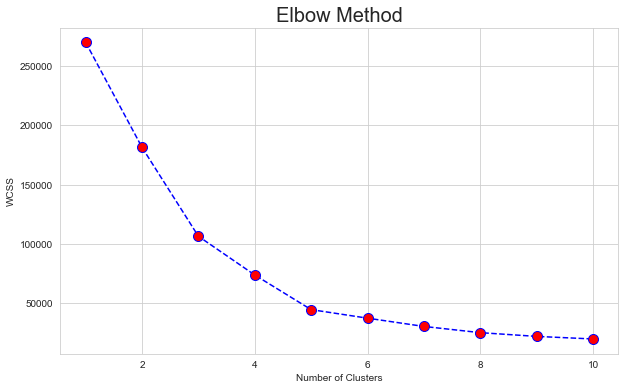

In [74]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Elbow Method', size=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [75]:
# optimum number of clusters: 5

In [80]:
kmeans= KMeans(n_clusters=5, init='k-means++', random_state=42)
#create dependent variable, resulting from training k means algorithm with 5 clusters
y_kmeans=kmeans.fit_predict(X)

In [81]:
#output: clusters to which customers belong
#Customer 1 belongs to cluster 2
#Customer 2 belongs to cluster 3......

print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


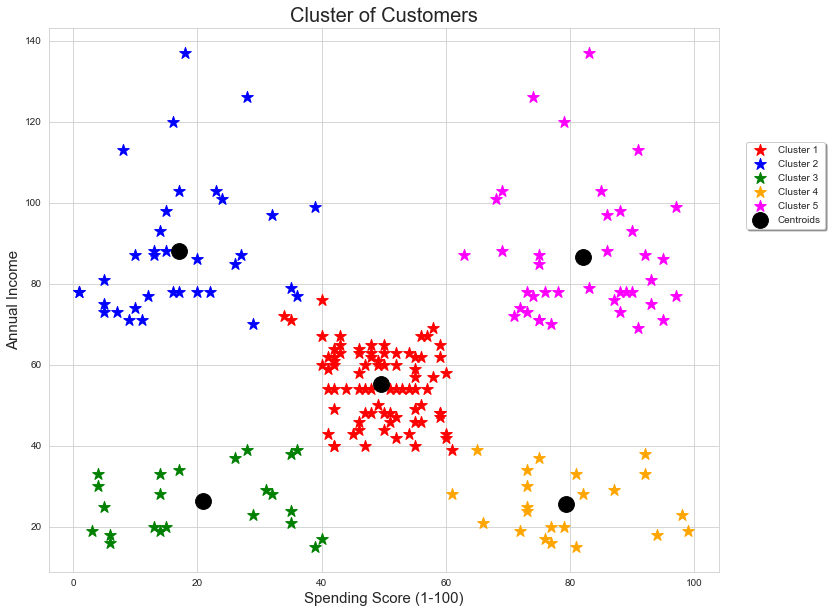

In [82]:
#Plot the clusters
X = np.array(X)
fig=plt.figure(figsize=(12,10))

plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=150, marker='*', c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=150,marker='*', c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=150, marker='*',c='green', label='Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=150,marker='*', c='orange', label='Cluster 4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=150,marker='*' ,c='magenta', label='Cluster 5')

#centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=250,c='black',marker="o", label='Centroids')

plt.title('Cluster of Customers', size= 20)
plt.xlabel('Spending Score (1-100)', size=15)
plt.ylabel('Annual Income', size=15)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1)



plt.show()